In [96]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torch
from torchvision import datasets
from dataset import EyeTrackingDataset
from torch.utils.data import DataLoader



In [97]:
IMAGE_DIR    = 'data/Images'                                    # contains TCImages/ & TSImages/
METADATA_CSV = 'Metadata_Participants.csv'

In [98]:
import os
import pandas as pd

# 1. Check current working directory
print("Working directory:", os.getcwd())

# 2. Build the correct path to your metadata CSV (from notebooks/)
csv_path = os.path.join('..', 'data', 'Metadata', 'Metadata_Participants.csv')
print("Loading metadata from:", csv_path)

# 3. Load the CSV
metadata = pd.read_csv(csv_path)
print("Metadata preview:\n", metadata.head(), '\n')
class_counts = metadata['Class'].value_counts()



Working directory: c:\Users\siyas\Documents\eye\notebooks
Loading metadata from: ..\data\Metadata\Metadata_Participants.csv
Metadata preview:
    ParticipantID Gender Date of Presentation  Age Class  CARS Score
0              1      M           27/04/2015  7.0    TS        32.5
1              2      F           28/04/2015  8.9    TS        36.5
2              3      M           28/04/2015  4.4    TS        27.0
3              4      M           29/04/2015  6.9    TS        35.0
4              5      M           06/05/2015  8.9    TS        31.0 



In [99]:
class_counts = metadata['Class'].value_counts()
print(class_counts)


Class
TC    30
TS    29
Name: count, dtype: int64


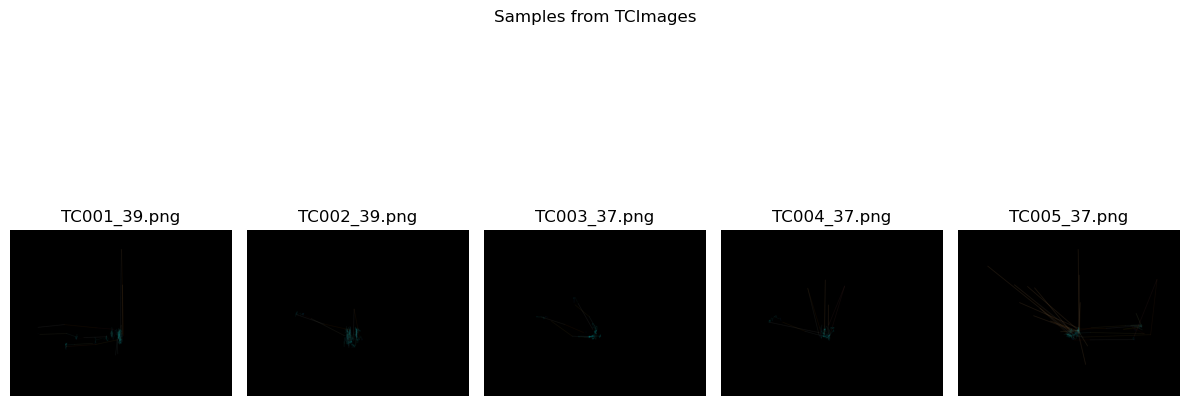

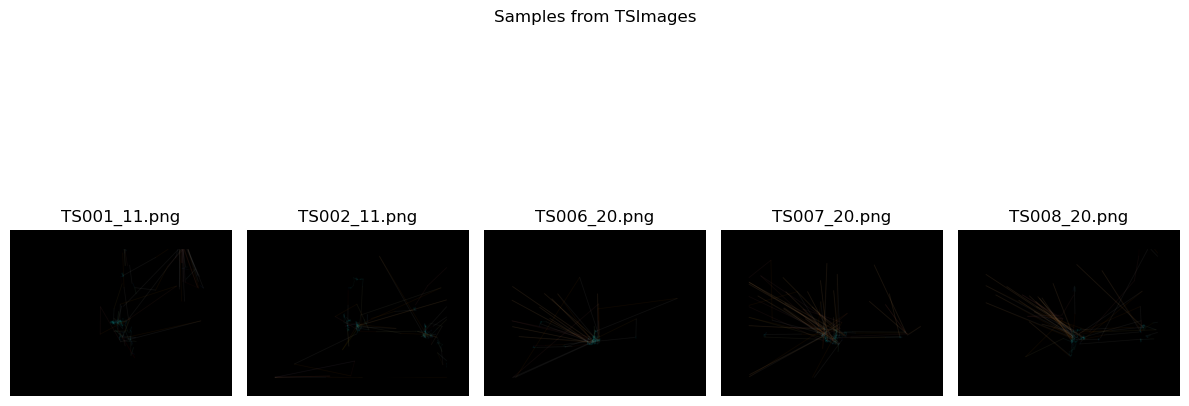

In [100]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# If you're inside notebooks/, this points to the actual data folder:
IMAGE_DIR = os.path.join('..', 'data', 'Images')

def plot_sample_images(class_name):
    class_path = os.path.join(IMAGE_DIR, class_name)
    samples = os.listdir(class_path)[:5]
    plt.figure(figsize=(12, 6))
    for i, fname in enumerate(samples):
        img = Image.open(os.path.join(class_path, fname))
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(fname)
        plt.axis('off')
    plt.suptitle(f"Samples from {class_name}")
    plt.tight_layout()
    plt.show()

# Now these calls will work:
plot_sample_images('TCImages')   # Non-ASD
plot_sample_images('TSImages') 

  # ASD


In [101]:

# 5) Define transforms
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])



In [102]:

class_counts = metadata['Class'].value_counts()
print("\nClass Distribution:\n", class_counts)



Class Distribution:
 Class
TC    30
TS    29
Name: count, dtype: int64


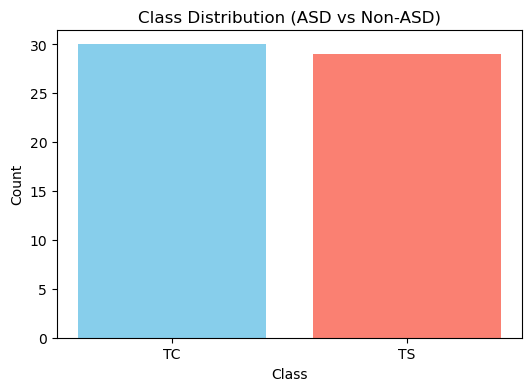

In [103]:
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.title('Class Distribution (ASD vs Non-ASD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [104]:
sample_dir_non_asd = os.path.join(IMAGE_DIR, 'TCImages')
sample_dir_asd = os.path.join(IMAGE_DIR, 'TSImages')


In [105]:
# Define the root directory (navigate one level up from notebooks folder)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Navigate up from the notebooks folder
IMAGE_DIR = os.path.join(PROJECT_ROOT, 'data', 'Images')  # Root images directory

# Now access the specific subdirectories
TC_IMAGES_DIR = os.path.join(IMAGE_DIR, 'TCImages')  # Non-ASD images directory
TS_IMAGES_DIR = os.path.join(IMAGE_DIR, 'TSImages')  # ASD images directory


In [106]:
sample_img_path = os.path.join(TC_IMAGES_DIR, os.listdir(TC_IMAGES_DIR)[0])  # Get the first image
sample_img = Image.open(sample_img_path).convert("RGB")  # Convert to RGB


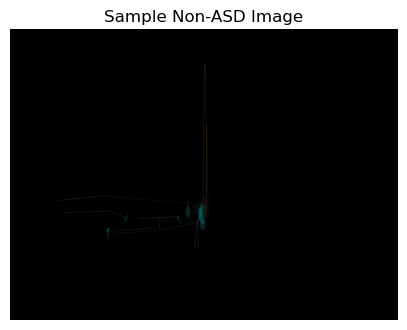

In [107]:
plt.figure(figsize=(5, 5))
plt.imshow(sample_img)
plt.title('Sample Non-ASD Image')
plt.axis('off')
plt.show()

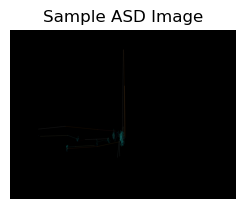

In [108]:
plt.subplot(1, 2, 2)
plt.imshow(sample_img)
plt.title('Sample ASD Image')
plt.axis('off')

plt.show()

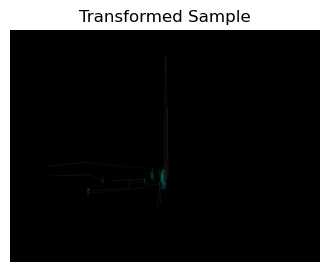

In [109]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

# Define the transformation with RGB conversion
transform = transforms.Compose([
    transforms.Lambda(lambda img: img.convert("RGB")),  # Ensure RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Directory setup
IMAGE_DIR = 'data/Images'

# 6) Show a transformed sample
sample_dir = os.path.join(IMAGE_DIR, 'TCImages')
sample_img = Image.open(sample_path).convert("RGB")  # Convert to RGB

trans_img = transform(sample_img)

# Unnormalize for display
unnorm = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
img_to_show = unnorm(trans_img).clamp(0, 1)

plt.figure(figsize=(4, 4))
plt.imshow(img_to_show.permute(1, 2, 0))
plt.title("Transformed Sample")
plt.axis('off')
plt.show()


In [110]:
metadata['Class'] = metadata['Class'].map({'Non-ASD': 0, 'ASD': 1})  # Map class labels to numeric


In [111]:
correlation = metadata[['Age', 'Class']].corr()
print("\nCorrelation between Age and Class:\n", correlation)




Correlation between Age and Class:
        Age  Class
Age    1.0    NaN
Class  NaN    NaN


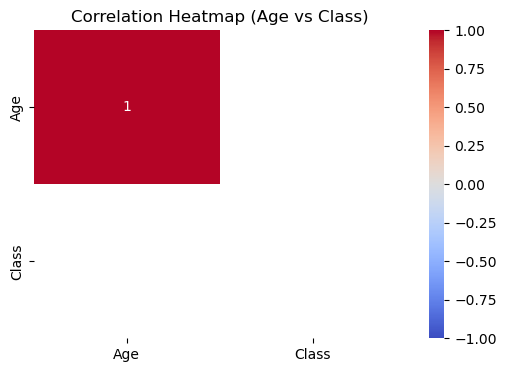

In [112]:
# Plot correlation heatmap (for Age vs Class)
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Age vs Class)")
plt.show()




Summary Statistics for Metadata:
       ParticipantID        Age  Class  CARS Score
count      59.000000  59.000000    0.0   29.000000
mean       30.000000   7.883051    NaN   32.965517
std        17.175564   2.791252    NaN    6.551896
min         1.000000   2.700000    NaN   17.000000
25%        15.500000   5.750000    NaN   27.000000
50%        30.000000   8.100000    NaN   34.500000
75%        44.500000   9.800000    NaN   36.500000
max        59.000000  12.900000    NaN   45.000000


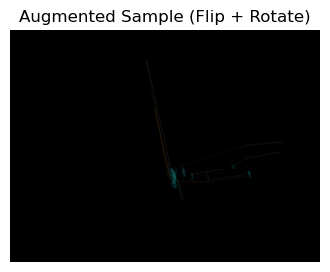

In [113]:
print("\nSummary Statistics for Metadata:")
print(metadata.describe())

# Extra: Visualize augmented images (if you apply augmentation)
aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
])

augmented_img = aug_transform(sample_img)

# Display augmented image
plt.figure(figsize=(4, 4))
plt.imshow(augmented_img.permute(1, 2, 0))
plt.title("Augmented Sample (Flip + Rotate)")
plt.axis('off')
plt.show()

In [114]:
import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms

# Define the dataset and transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224
    transforms.ToTensor(),   # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet stats
])

# Use absolute path for dataset
IMAGE_DIR = 'C:/Users/siyas/Documents/eye/data/Images'  # Update with your absolute path

# Initialize dataset
train_dataset = EyeTrackingDataset(root_dir=IMAGE_DIR, transform=transform)

# Create DataLoader to iterate through the dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Class Distribution in the Dataset
labels = train_dataset.labels  # Access the binary labels (0 for Non-ASD, 1 for ASD)
label_counts = [labels.count(0), labels.count(1)]  # Count the occurrence of each class

#


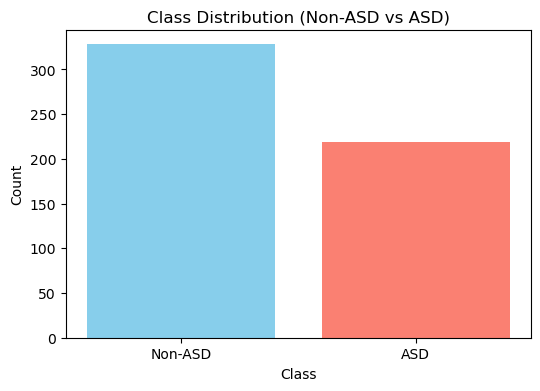

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..-0.14867094].


Total samples in dataset: 547
First sample label: Non-ASD


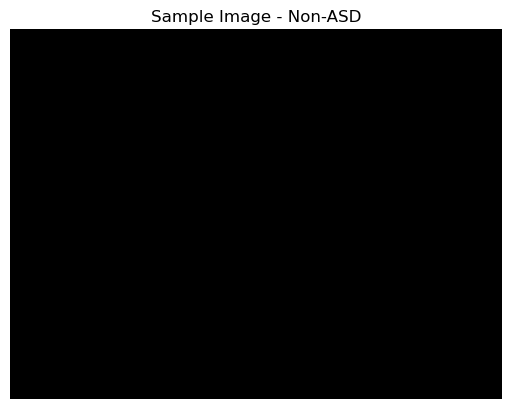

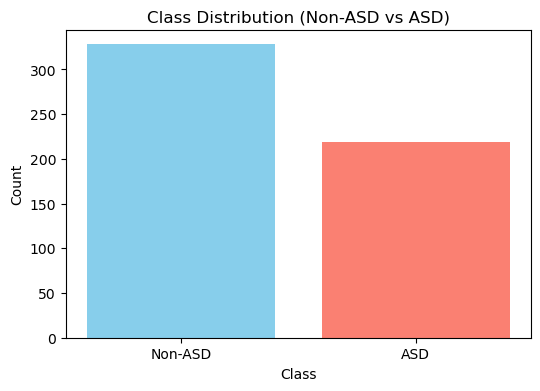

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..-0.14867094].


Total samples in dataset: 547
First sample label: Non-ASD


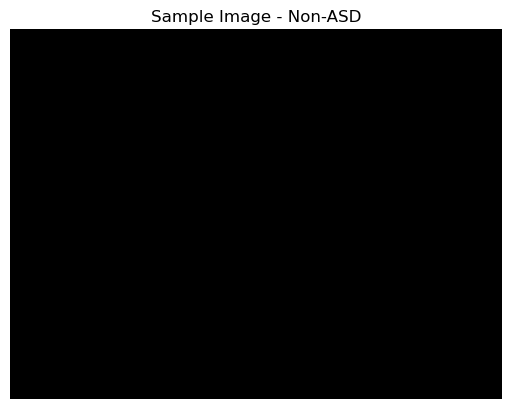

In [115]:
plt.figure(figsize=(6, 4))
plt.bar([0, 1], label_counts, color=['skyblue', 'salmon'])
plt.title('Class Distribution (Non-ASD vs ASD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-ASD', 'ASD'])
plt.show()

# Calculate total number of samples
total_samples = len(train_dataset)
print(f"Total samples in dataset: {total_samples}")

# Check first few images from the dataset
sample_img, sample_label = train_dataset[0]

# Display the label of the first sample
print(f"First sample label: {'ASD' if sample_label == 1 else 'Non-ASD'}")

# Convert the sample tensor to a PIL image to show it using matplotlib
# `sample_img` is a tensor, so we need to reverse the transformation to display it properly
sample_img = sample_img.permute(1, 2, 0)  # Reorder dimensions to HWC for plotting
sample_img = sample_img.numpy()  # Convert tensor to numpy array

# Show the first image (to check)
plt.imshow(sample_img)
plt.title(f"Sample Image - {'ASD' if sample_label == 1 else 'Non-ASD'}")
plt.axis('off')
plt.show() 
plt.figure(figsize=(6, 4))
plt.bar([0, 1], label_counts, color=['skyblue', 'salmon'])
plt.title('Class Distribution (Non-ASD vs ASD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-ASD', 'ASD'])
plt.show()

# Calculate total number of samples
total_samples = len(train_dataset)
print(f"Total samples in dataset: {total_samples}")

# Check first few images from the dataset
sample_img, sample_label = train_dataset[0]

# Display the label of the first sample
print(f"First sample label: {'ASD' if sample_label == 1 else 'Non-ASD'}")

# Convert the sample tensor to a PIL image to show it using matplotlib
# `sample_img` is a tensor, so we need to reverse the transformation to display it properly
sample_img = sample_img.permute(1, 2, 0)  # Reorder dimensions to HWC for plotting
sample_img = sample_img.numpy()  # Convert tensor to numpy array

# Show the first image (to check)
plt.imshow(sample_img)
plt.title(f"Sample Image - {'ASD' if sample_label == 1 else 'Non-ASD'}")
plt.axis('off')
plt.show()

In [116]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.
